<a href="https://colab.research.google.com/github/kclassie/ML_sundries/blob/main/%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%86%D1%81%D0%B5%D1%82%D0%B8_%D0%9A%D0%BE%D0%BD%D1%81%D0%BF%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Загружаем пакеты

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, integrate
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import networkx as nx

Выгрузите социальную сеть с набором индивидуальных характеристик и сопоставьте показатели центральности с индивидуальными характеристиками. https://www.stats.ox.ac.uk/~snijders/siena/ Description students data sets van de Bunt

1) Постройте распределение центральностей.

2) Сопоставьте средние центральности для мальчиков и девочек. (Как Вы думаете, какой тест может быть для этого использован, а какой - нет)?

3) Сравните средние ранги для центральностей девочек и мальчиков/ или курящих и некурящих, используйте любые показатели, деление на которые Вам кажется интересным (rank_degree=rankdata(centralities['degree'])). Скажите, для чего это может быть нужно и в каких случаях используется такой подход?

4) Сопоставьте другие центральности для мальчиков и девочек.

5) Используя метод k-средних (или другой метод кластерного анализа,), выделите типичные сценарии поведения учащихся и интерпретируйте их.

In [ ]:
#Препроцессинг данных в Excel
#1 - перевод из  dat в  csv
#2 - перевод из  dat в  csv


net_df=pd.read_csv("fri4.csv", sep=";", header=0)
print(net_df.shape) #shape показывает число строк и колонок
net_df.head()

(32, 33)


,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
net_df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,7,1,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,0,1,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
net_df=net_df.drop(["Unnamed: 0"], axis=1).values
np.fill_diagonal(net_df, 0)
net=nx.DiGraph(net_df)

In [ ]:
net_df

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
net

In [ ]:
print("В социальной сети {} вершины и {} ребер.".format(net.number_of_nodes(), net.number_of_edges()))

В социальной сети 32 вершины и 175 ребер.


In [ ]:
degree_net = nx.degree_centrality(net)
closeness_net = nx.closeness_centrality(net)
eigenvector_net = nx.eigenvector_centrality(net)
betweenness_net = nx.betweenness_centrality(net)

n = len(net.nodes())
deg = np.zeros(n)
cl = np.zeros(n)
eig = np.zeros(n)
bw = np.zeros(n)
i=0
for node in net:
    deg[i] = degree_net[node]
    cl[i] = closeness_net[node]
    eig[i] = eigenvector_net[node]
    bw[i] = betweenness_net[node]
    i+=1
    
centralities = pd.DataFrame()
centralities['nodes'] = net.nodes()
centralities.set_index(['nodes'], inplace=True)
centralities['eigenvector'] = pd.DataFrame.from_dict(eigenvector_net, orient='index')
centralities['closeness'] = pd.DataFrame.from_dict(closeness_net, orient='index')
centralities['degree'] = pd.DataFrame.from_dict(degree_net, orient='index')
centralities['betweenness'] = pd.DataFrame.from_dict(betweenness_net, orient='index')
centralities.head()


,eigenvector,closeness,degree,betweenness
nodes,,,,
0,0.086294,0.331797,0.290323,0.091546
1,0.132406,0.344086,0.225806,0.000735
2,0.215300,0.428964,0.258065,0.000000
3,0.071800,0.294931,0.290323,0.003459
4,0.138209,0.360023,0.161290,0.000000


In [ ]:
iv_df=pd.read_csv("iv.csv", sep=";", header=0)
print(net_df.shape)
iv_df.head()

(32, 32)


,id,gender,program,smoke
0,1,1,3,1
1,2,1,4,2
2,3,1,4,2
3,4,1,4,2
4,5,1,4,2


In [ ]:
iv_df["degree"]=centralities["degree"]
iv_df.head() #выдает первые 5 наблюдений из датафрейма

,id,gender,program,smoke,degree
0,1,1,3,1,0.290323
1,2,1,4,2,0.225806
2,3,1,4,2,0.258065
3,4,1,4,2,0.290323
4,5,1,4,2,0.161290


- Домашнее задание пункт 1

Подшиваем все остальные сетевые показатели и смотрим на пересечения с индивидуальными характеристиками(см прошлое занятие, пункт 2-4). Можно смотреть не только на пол, но и, к примеру, на курение! У кого больше другей, у того кто курит или нет?
Обязательно нужна интерпретация результатов

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0, 3)

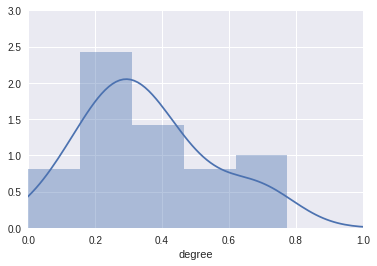

In [ ]:
#Распределение центральностей. Не забудьте, что наша центральность нормирована.
sns.distplot(iv_df["degree"])
plt.xlim(0, 1)
plt.ylim(0, 3)

Хм, что-то странное, почему у нас не power law?

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(0, 3)

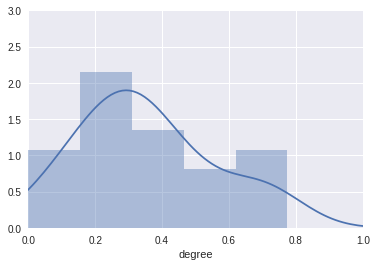

In [ ]:
#Что с мальчиками и девочками?
#Держим в голове, что выборка маленькая. Мальчиков вообще почти нет

centralities_girls=iv_df[iv_df["gender"]==1]
sns.distplot(centralities_girls['degree'])
plt.xlim(0, 1)
plt.ylim(0, 3)

- Домашнее задание пункт 2

Строим для всех и для каждого пола и курения по отдельности распределения. Сопоставляем и пишем выводы

In [ ]:
#Рассчитаем ранги

from scipy.stats import rankdata

rank_degree=rankdata(iv_df['degree'])
df_rank = pd.DataFrame(rank_degree)
df_rank.columns = df_rank.columns+1
df_rank.columns = ['Rank']
df_rank.index = df_rank.index + 1

iv_df['Rank'] = list(df_rank['Rank'])
iv_df.head()

,id,gender,program,smoke,degree,Rank
0,1,1,3,1,0.290323,14.5
1,2,1,4,2,0.225806,8.0
2,3,1,4,2,0.258065,11.0
3,4,1,4,2,0.290323,14.5
4,5,1,4,2,0.161290,5.5


In [ ]:
#Выделяем группы
girls=iv_df[iv_df['gender']==1]
boys=iv_df[iv_df['gender']==2]
print (girls.head())
print (boys.head())

   id  gender  program  smoke    degree  Rank
0   1       1        3      1  0.290323  14.5
1   2       1        4      2  0.225806   8.0
2   3       1        4      2  0.258065  11.0
3   4       1        4      2  0.290323  14.5
4   5       1        4      2  0.161290   5.5
    id  gender  program  smoke    degree  Rank
11  12       2        3      1  0.161290   5.5
13  14       2        4      1  0.258065  11.0
18  19       2        3      1  0.387097  22.0
20  21       2        3      1  0.483871  25.0
25  26       2        3      1  0.225806   8.0


In [ ]:
#Сравнение средних рангов

print (girls['Rank'].mean())
print (boys['Rank'].mean())

#Для выборки побольше мы можем провести статистические сравнение, в данном случае оно неуместно.
#ttest_ind(girls['Rank'], boys['Rank'])

16.458333333333332
16.625


In [ ]:
#Кластерный анализ - не тема нашего урока. Но это неплохой подход к выявлению основных "сюжетов в данных"
#Подробнее про кластерный анализ можно почитать и посмотерть тут - https://mlcourse.ai (Topic 7).

clusters_df=iv_df.copy()
clusters_df=clusters_df.drop(columns=['id', 'degree'])
clusters_df.head()

,gender,program,smoke,Rank
0,1,3,1,14.5
1,1,4,2,8.0
2,1,4,2,11.0
3,1,4,2,14.5
4,1,4,2,5.5


In [ ]:
clusters_df.head()

,gender,program,smoke,Rank
0,1,3,1,14.5
1,1,4,2,8.0
2,1,4,2,11.0
3,1,4,2,14.5
4,1,4,2,5.5


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [ ]:
# Используем метод локтя
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(clusters_df)
    kmeanModel.fit(clusters_df)
    distortions.append(sum(np.min(cdist(clusters_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / clusters_df.shape[0])

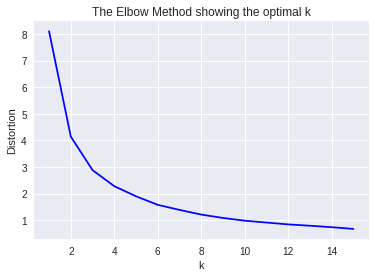

In [ ]:
# Рисуем
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# KMeans algorithm for the optimal number of clusters (k=5)
K = 3
kmeans_model = KMeans(n_clusters=K).fit(clusters_df)

#Centroid coordinates
centers3 = np.array(kmeans_model.cluster_centers_)
print(centers3)

[[ 1.27272727  3.27272727  1.72727273 15.        ]
 [ 1.25        3.33333333  1.58333333 26.5       ]
 [ 1.22222222  3.33333333  1.44444444  5.        ]]


In [ ]:
np.savetxt('centers3.csv', centers3, delimiter=',')

- Домашнее задание пункт 3. 
Выделите группы (на основе самостоятельно выбраных центральностей и индивидуальных характеристик) методами кластерного анализа и опишите их.
Как Вы полагаете, существует ли какая-то специфическая группа в этой выборке или выборка достаточно однородна?